# Supervised Machine Learning: Classification - Final Assignment
## Dry Bean Dataset


The dataset for his project is [Dry Bean](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset) dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). It is a popular dataset used in machine learning and statistical analysis. 
It contains information about 7 diffrent (Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira) dry bean and 13611 instances. A total of 16 features; 12 dimensions and 4 shape forms.
Main objective of this project is to construct a model that accurately predicts the category of the dry bean based on the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


## 1. Data Analysis

Attribute Informations
1. **Area (A):** The area of a bean zone and the number of pixels within its boundaries.
2. **Perimeter (P):** Bean circumference is defined as the length of its border.
3. **Major axis length (L):** The distance between the ends of the longest line that can be drawn from a bean.
4. **Minor axis length (l):** The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. **Aspect ratio (K):** Defines the relationship between L and l.
6. **Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.
7. **Convex area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. **Equivalent diameter (Ed):** The diameter of a circle having the same area as a bean seed area.
9. **Extent (Ex):** The ratio of the pixels in the bounding box to the bean area.
10. **Solidity (S):** Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. **Roundness (R):** Calculated with the following formula: (4piA)/(P^2)
12. **Compactness (CO):** Measures the roundness of an object: Ed/L
13. **ShapeFactor1 (SF1)**
14. **ShapeFactor2 (SF2)**
15. **ShapeFactor3 (SF3)**
16. **ShapeFactor4 (SF4)**
17. **Class** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [3]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [4]:
# num of rows x num of columns
print('Dataset Dimensions:',data.shape)
print("---------------------------------")
# types of each column
print(data.dtypes)

Dataset Dimensions: (13611, 17)
---------------------------------
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [5]:
numerical_columns = ["Area","Perimeter","MajorAxisLength","MinorAxisLength","AspectRation", "Eccentricity","ConvexArea","EquivDiameter",
                     "Extent","Solidity","roundness","Compactness","ShapeFactor1","ShapeFactor2","ShapeFactor3", "ShapeFactor4"]

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
data.duplicated().sum()

68

In [9]:
# Cleaning Duplicates
data = data.drop_duplicates()

### CountPlot

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

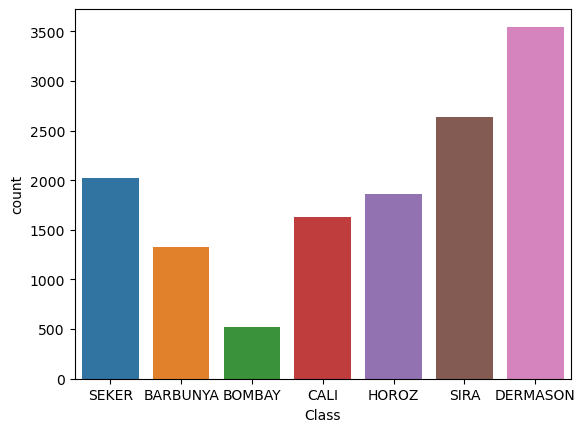

In [10]:
print(data['Class'].value_counts())
sns.countplot(x='Class', data=data)

- Imbalance Data

### Box Plot

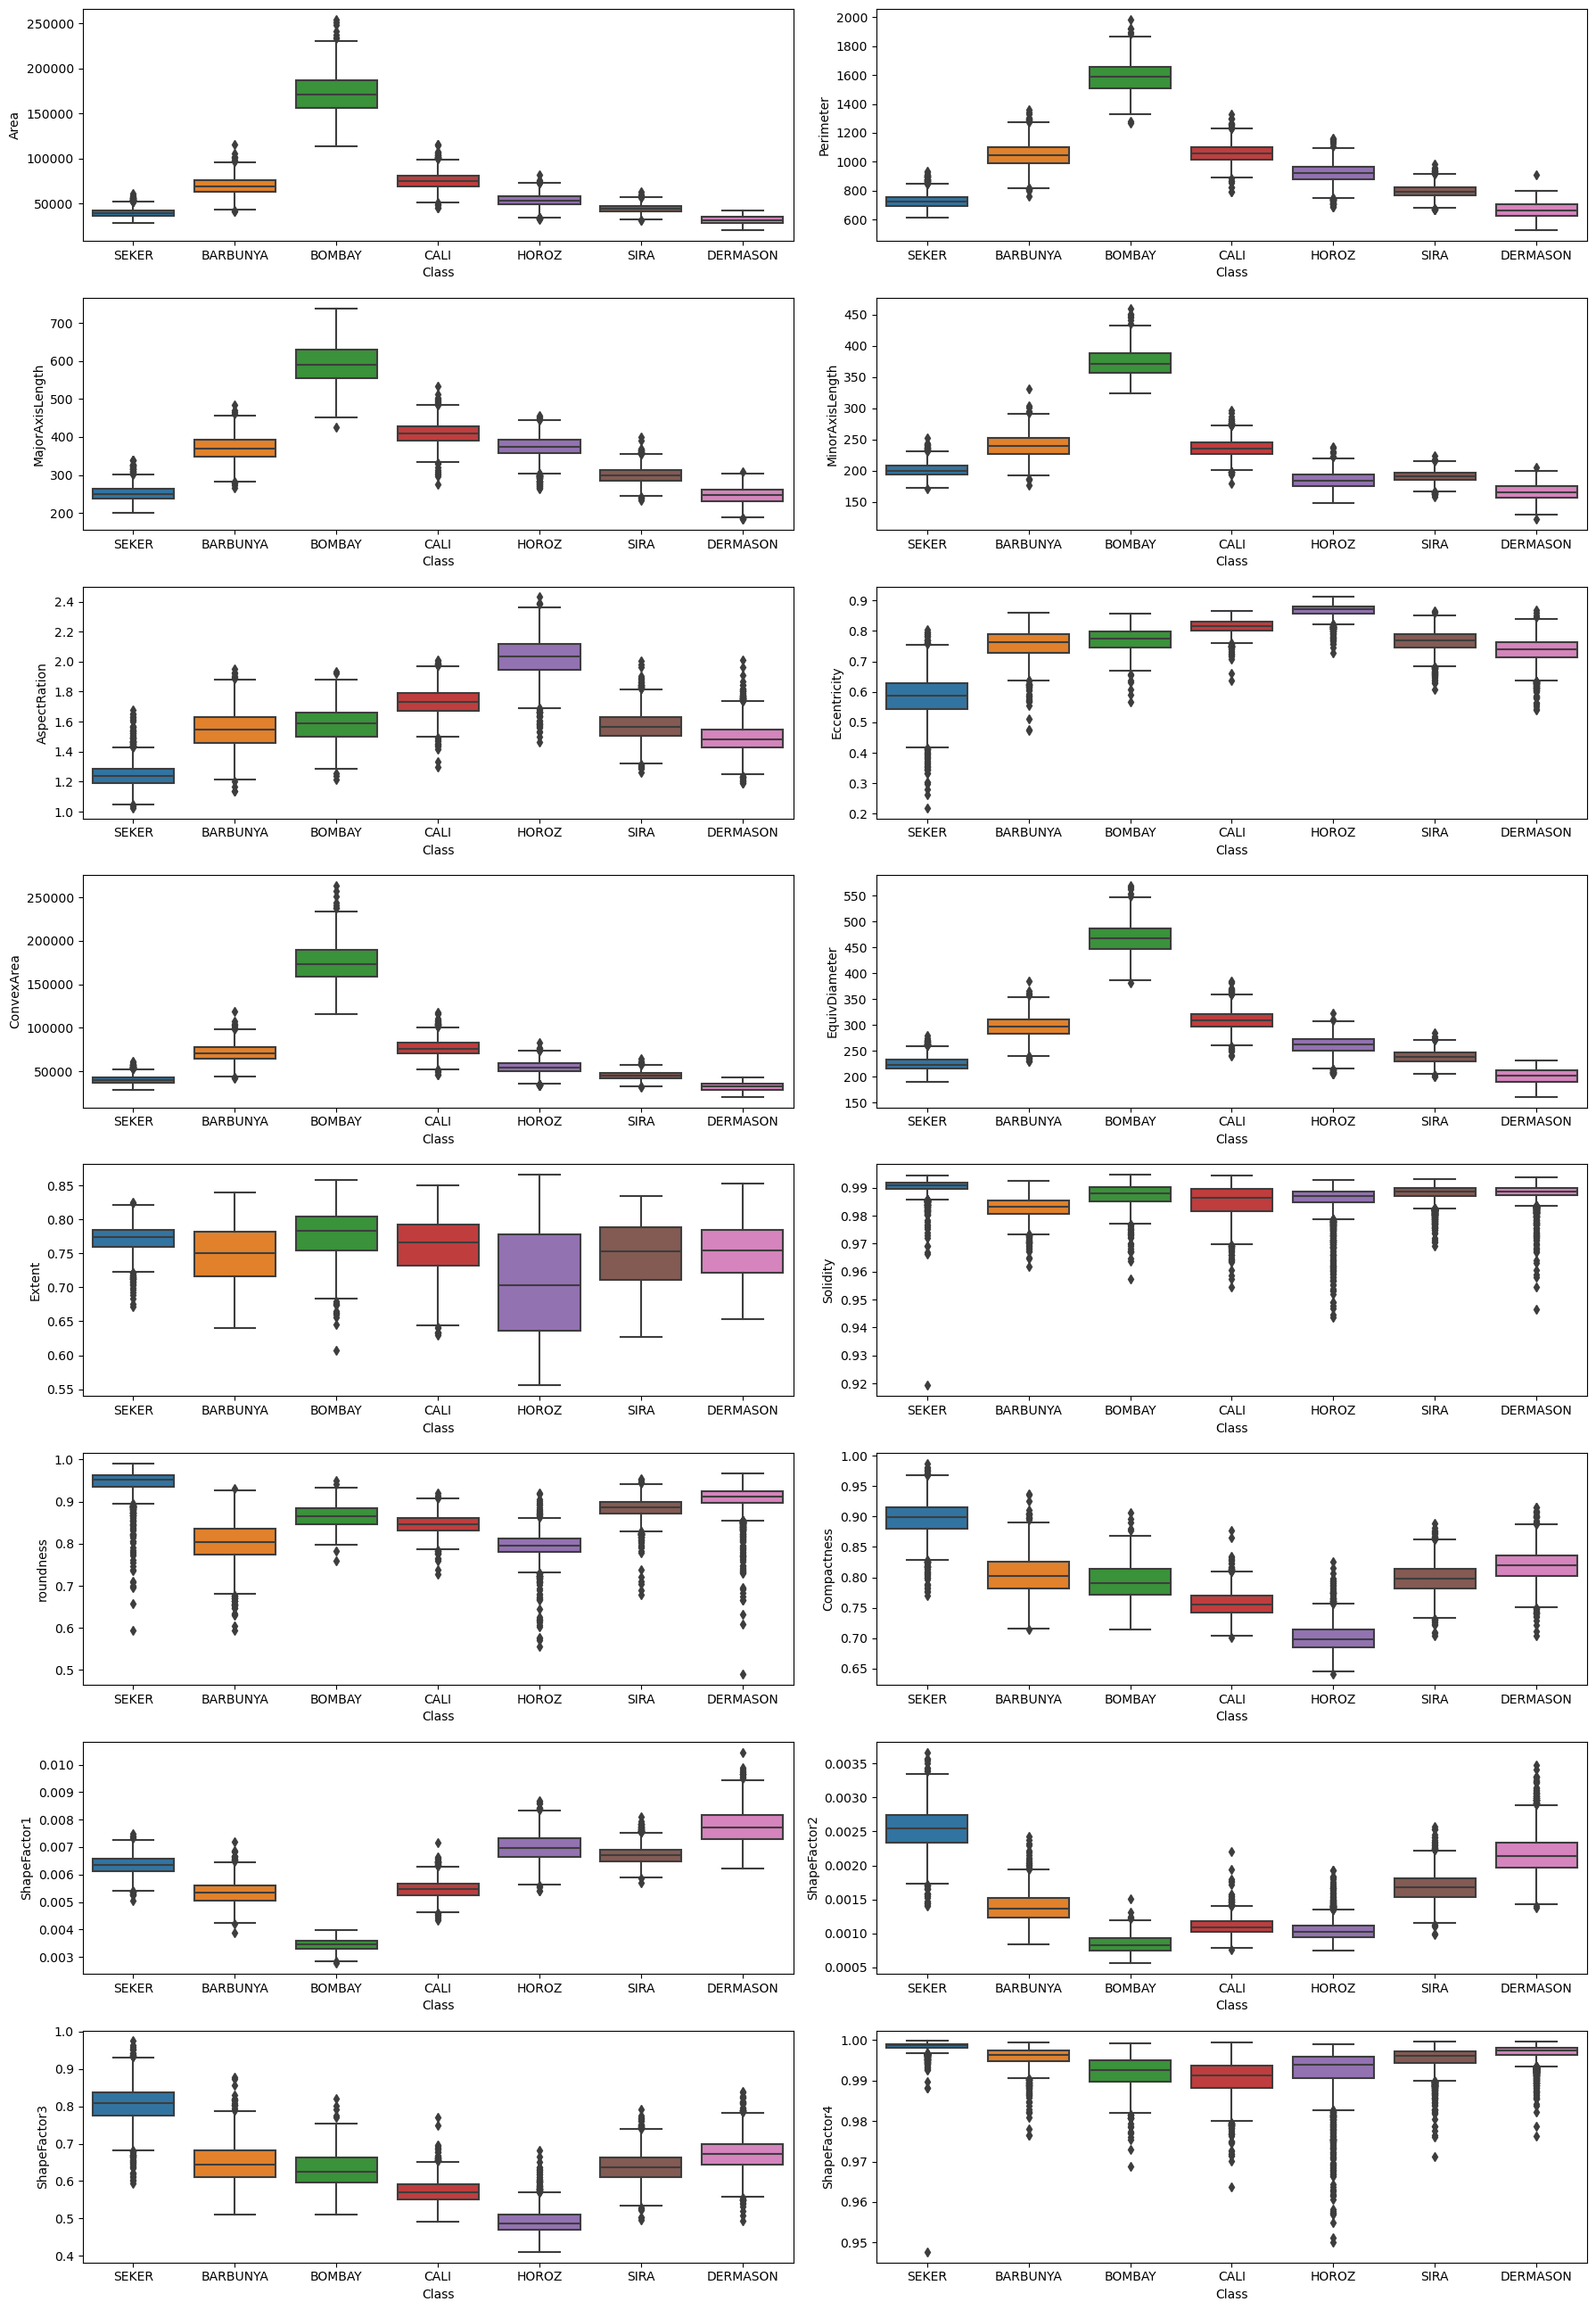

In [11]:
fig, ax = plt.subplots(8, 2, figsize=(18, 26) )

for variable, subplot in zip(numerical_columns, ax.flatten()):
    sns.boxplot(x=data['Class'], y= data[variable], ax=subplot)
plt.tight_layout()

- We can easily observe that the each feature have outliers for every class.

### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Class'] = encoder.fit_transform(data['Class'])

In [13]:
data['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

### Correlations

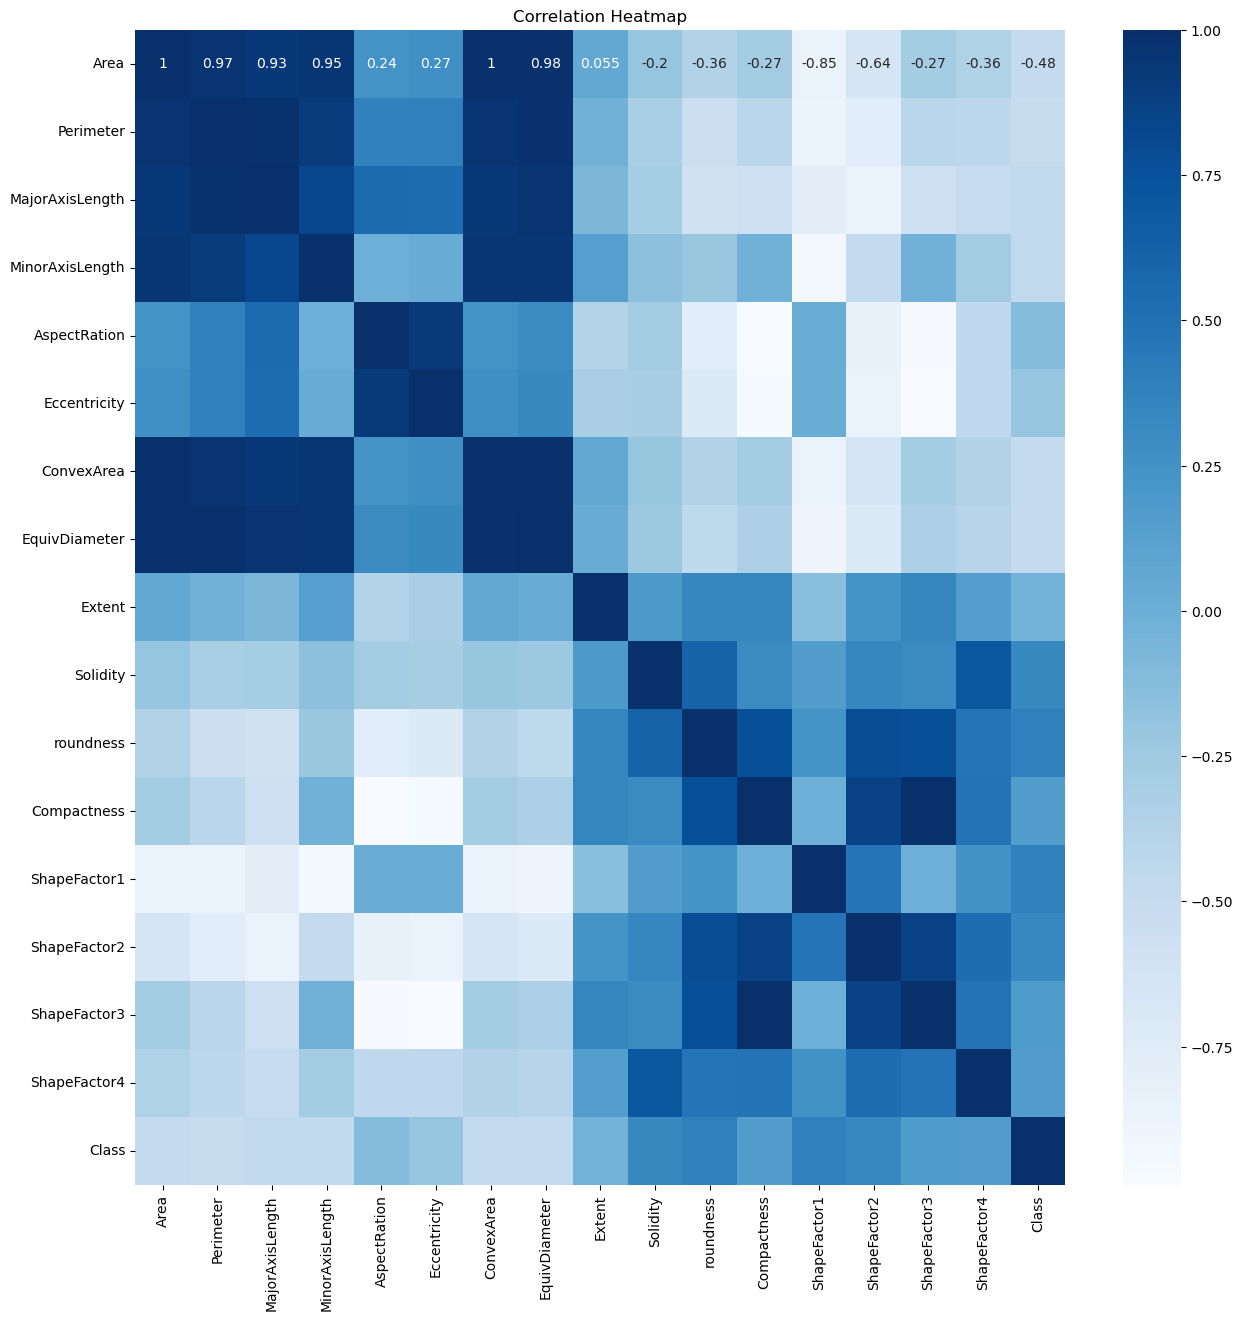

In [14]:
corr = data.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap')
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='Blues',
            annot=True)
plt.show()

In [15]:
corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019,-0.475413
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215,-0.508315
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464,-0.456515
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402,-0.458347
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598,-0.119588
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611,-0.202824
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302,-0.477624
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693,-0.481452
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622,-0.030855
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150,0.323356


- It is observed that there is a strong correlation between many of the features. For example, there is a correlation close to 0.97 between "Area" and "Perimeter", indicating that these two features are strongly connected to each other. Similarly, there is a strong correlation between "MajorAxisLength" and "MinorAxisLength".

- However, low or almost no correlation is observed between some features. For example, there is almost no correlation between "Area" and "Solidity".

- Finally, the feature "Class" has a low to moderate correlation with other features. 


## 2. Feature Engineering

### Preparing the dataset

In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

### Splitting Data Into Train and Test Sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Feature Scaling

In [28]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Robust Scaler used because data contains lots of outliers.

## 3. Classification Models

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [32]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)
logistic_pred = logistic.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)
print(classification_report(y_test, logistic_pred))

Logistic Regression Accuracy: 0.9154669619785899
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       293
           1       1.00      1.00      1.00       109
           2       0.92      0.94      0.93       288
           3       0.92      0.91      0.91       711
           4       0.95      0.94      0.94       372
           5       0.94      0.94      0.94       410
           6       0.84      0.86      0.85       526

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



### Random Forest

In [33]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
random_forest_pred = random_forest.predict(X_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)
print(classification_report(y_test, random_forest_pred))

Random Forest Accuracy: 0.9165743816906607
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       293
           1       1.00      1.00      1.00       109
           2       0.92      0.94      0.93       288
           3       0.90      0.93      0.91       711
           4       0.95      0.92      0.94       372
           5       0.93      0.95      0.94       410
           6       0.86      0.84      0.85       526

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709



### SVM 

In [34]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.9258028792912514
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       293
           1       1.00      1.00      1.00       109
           2       0.93      0.95      0.94       288
           3       0.92      0.93      0.92       711
           4       0.96      0.94      0.95       372
           5       0.95      0.95      0.95       410
           6       0.87      0.87      0.87       526

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709



### Decision Tree


In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
decision_tree_pred = decision_tree.predict(X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print(classification_report(y_test, decision_tree_pred))

Decision Tree Accuracy: 0.890734588409007
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       293
           1       1.00      1.00      1.00       109
           2       0.90      0.92      0.91       288
           3       0.88      0.89      0.89       711
           4       0.92      0.92      0.92       372
           5       0.92      0.92      0.92       410
           6       0.82      0.79      0.81       526

    accuracy                           0.89      2709
   macro avg       0.91      0.91      0.91      2709
weighted avg       0.89      0.89      0.89      2709



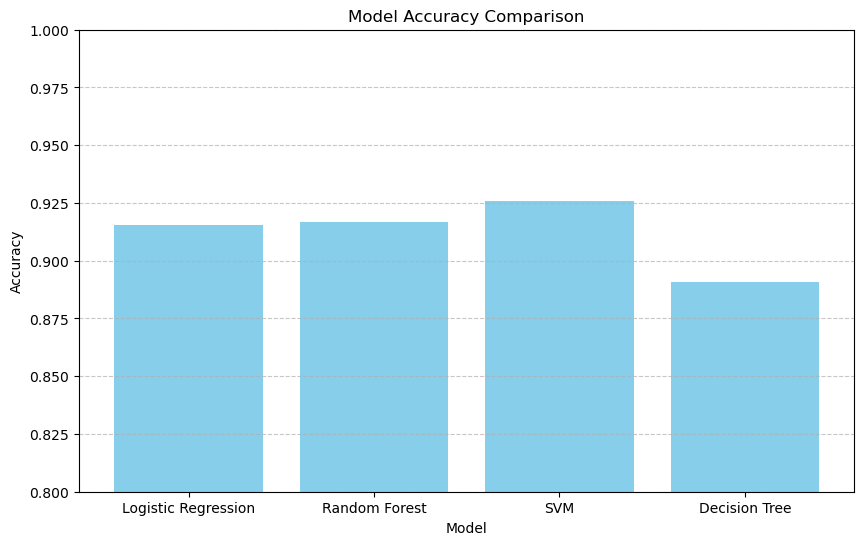

In [38]:
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree']

accuracies = [logistic_accuracy, random_forest_accuracy, svm_accuracy, decision_tree_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.80, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Discussion

- I used 4 diffent classificaiton models; Logistic Regression, SVM, Random Forest and Decision Tree. It was preferred that these models have different explainability and predictability features. All models uses the same training and test splits.
  
- SVM classifier, gets hisghest accuracy score. Also it gets highest precison and recall scores. Therefore, it is considered that the SVM model is the best option both in terms of accuracy and explainability.
  
- In Class 1 (BOMBAY), it is observed that all models scored 1 point in all metrics. Since the BOMBAY class has less data than the other classes and also contains too many outliers, it is thought that the data is overfitting.

- For further analysis of the data, it may be suggested to add specific data features. This can help achieving better prediction. Furthermore, this dataset is unbalanced and has a large number of outliers. Therefore, it would be better to organise these problems with other approaches and compare the performance of these approaches.